## Import libraries and Read in Data
2 files - Daily Stock price data, Sector mapping file

In [5]:
ENV="nimbix" # dustinsmac / nimbix
if(ENV == "dustinsmac") : 
    rootdir = "/data/work/osa/2018-04-eigenportfolios/"
else :
    rootdir = "/data/mldl-101/labxx-eigenportfolios/"

In [41]:
import pandas as pd
import numpy as np
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
#ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
# A,1999-11-18,45.5,50.0,40.0,44.0,44739900.0,0.0,1.0,31.041951216877,34.112034304261,27.289627443409,30.018590187749,44739900.0
# A,1999-11-19,42.94,43.0,39.81,40.38,10897100.0,0.0,1.0,29.295415060499,29.336349501664,27.160001713052,27.548878904121,10897100.0

price_df = pd.read_csv(rootdir + "WIKI_PRICES.csv")
#price_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/WIKI_PRICES.10000.csv")
sectors_df = pd.read_csv(rootdir + "sectors.csv")


In [42]:
price_df.columns
sectors_df.columns

Index([u'Ticker symbol', u'Security', u'SEC filings', u'GICS Sector',
       u'GICS Sub Industry', u'Address of Headquarters',
       u'Date first added[3][4]', u'CIK'],
      dtype='object')

In [43]:
price_df.ticker.unique()

array(['A', 'AA', 'AAL', ..., 'ZQK', 'ZTS', 'ZUMZ'], dtype=object)

## Keep data within date range

In [45]:
# Type conversion for date column.  Just adding a new column called dt
price_df['dt'] = pd.to_datetime(price_df.date, unit='ns') # 
print(price_df.dtypes)

# For now use data from 2017 up through present
price_df = price_df[price_df.dt > '2017-01-01']
price_df = price_df[price_df.dt < '2018-04-01']

ticker                 object
date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
ex-dividend           float64
split_ratio           float64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume            float64
dt             datetime64[ns]
dtype: object


In [46]:
price_df[price_df.ticker == 'EXXI'].head(50)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume,dt
5113306,EXXI,2017-01-17,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-17
5113307,EXXI,2017-01-18,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-18
5113308,EXXI,2017-01-19,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-19
5113309,EXXI,2017-01-20,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-20
5113310,EXXI,2017-01-23,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-23
5113311,EXXI,2017-01-24,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-24
5113312,EXXI,2017-01-25,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-25
5113313,EXXI,2017-01-26,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-26
5113314,EXXI,2017-01-27,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-27
5113315,EXXI,2017-01-30,0.1300,0.1300,0.130,0.13,0.0,0.0,1.0,0.1300,0.1300,0.130,0.13,0.0,2017-01-30


In [35]:
# reshape pandas array .  Here lets just grab the closing value...
price_df = price_df.pivot(index='date', columns='ticker', values='close')

In [36]:
# use dummy data here if you want ..
#price_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/dummydata.csv",index_col=0)
price_df["EXXI"]

date
2017-01-03        NaN
2017-01-04        NaN
2017-01-05        NaN
2017-01-06        NaN
2017-01-09        NaN
2017-01-10        NaN
2017-01-11        NaN
2017-01-12        NaN
2017-01-13        NaN
2017-01-17     0.1300
2017-01-18     0.1300
2017-01-19     0.1300
2017-01-20     0.1300
2017-01-23     0.1300
2017-01-24     0.1300
2017-01-25     0.1300
2017-01-26     0.1300
2017-01-27     0.1300
2017-01-30     0.1300
2017-01-31     0.1300
2017-02-01     0.1300
2017-02-02     0.1300
2017-02-03     0.1300
2017-02-06     0.1300
2017-02-07     0.1300
2017-02-08     0.1300
2017-02-09     0.1300
2017-02-10     0.1300
2017-02-13     0.1300
2017-02-14     0.1300
2017-02-15     0.1300
2017-02-16     0.1300
2017-02-17     0.1300
2017-02-21     0.1300
2017-02-22     0.1300
2017-02-23     0.1300
2017-02-24     0.1300
2017-02-27     0.1300
2017-02-28    32.5000
2017-03-01    30.2500
2017-03-02    29.0500
2017-03-03    29.0000
2017-03-06    30.8000
2017-03-07    30.7500
2017-03-08    30.0000
2017-

## Create daily return dataframe using pandas convenience function..

In [37]:
daily_return_df = price_df.pct_change()
# drop columns with 3 or more NaN
daily_return_df.dropna(axis=1, thresh=3, inplace=True)
#daily_return_df.dropna(axis=0, inplace=True)

In [38]:
# impute NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'mean')
imputer.fit(daily_return_df)
daily_return_df2 = imputer.transform(daily_return_df)
daily_return_df = pd.DataFrame(daily_return_df2,columns=daily_return_df.columns)

In [39]:
daily_return_df["EXXI"]

0        0.840709
1        0.840709
2        0.840709
3        0.840709
4        0.840709
5        0.840709
6        0.840709
7        0.840709
8        0.840709
9        0.840709
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.000000
15       0.000000
16       0.000000
17       0.000000
18       0.000000
19       0.000000
20       0.000000
21       0.000000
22       0.000000
23       0.000000
24       0.000000
25       0.000000
26       0.000000
27       0.000000
28       0.000000
29       0.000000
30       0.000000
31       0.000000
32       0.000000
33       0.000000
34       0.000000
35       0.000000
36       0.000000
37       0.000000
38     249.000000
39      -0.069231
40      -0.039669
41      -0.001721
42       0.062069
43      -0.001623
44      -0.024390
45      -0.009333
46       0.003701
47      -0.006034
48      -0.022934
49      -0.002416
50      -0.014879
51      -0.045311
52       0.068433
53       0.000000
54       0.006887
55       0

In [15]:
daily_return_df.head()

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
0,0.001256,0.001720,0.000481,0.001482,0.001429,0.001569,0.000563,-0.000966,0.001287,-0.000828,0.000663,0.001126,0.001411,0.000204,0.000729,0.002172,0.000284,-0.000581,0.003187,0.001469,-0.000294,0.006007,-0.000837,-0.000042,-0.002929,...,0.003497,0.001459,-0.000041,0.000202,0.000624,0.002742,-0.000531,-0.000895,0.000965,0.000564,0.001389,0.002416,0.000241,0.001621,0.002751,-0.000068,0.006523,0.000720,-0.000258,-0.000161,0.003426,0.001273,-0.001063,0.001435,0.000749
1,0.013121,0.049601,0.008639,0.055660,0.021003,0.017749,0.022489,0.008206,-0.001119,0.019517,0.011639,-0.003170,0.014100,0.024815,0.021739,-0.027616,0.024000,0.015686,0.030082,0.007939,0.110184,0.057308,0.027254,0.022727,0.019204,...,-0.027523,0.014904,0.005108,0.010477,0.031397,0.029820,0.011749,0.044313,0.003639,0.011019,-0.003493,0.049296,0.009194,0.009043,0.004519,0.047306,0.011765,0.014358,0.058501,0.008065,0.045527,0.015094,0.048978,0.009703,0.034091
2,-0.011890,0.012888,-0.017345,0.036640,-0.038686,-0.029775,-0.029326,-0.000698,0.005085,0.001823,-0.019175,-0.014964,0.007584,-0.011576,-0.010078,0.020927,-0.018750,-0.020994,-0.008035,0.008638,-0.008140,-0.007917,0.004987,-0.014815,-0.019740,...,-0.141509,-0.009129,-0.008112,-0.014689,0.005074,0.031952,-0.010323,-0.020509,0.003310,-0.029973,-0.018064,-0.020134,0.006425,-0.026198,0.004948,-0.010998,0.011628,-0.016210,-0.027634,-0.018000,-0.037418,-0.014870,0.037353,-0.003327,-0.094505
3,0.031156,0.000979,0.006973,0.017241,-0.014372,-0.017098,-0.012085,-0.013091,0.011148,-0.005232,-0.007820,0.017850,0.000314,0.013384,-0.002262,0.064422,-0.016720,-0.018733,0.005313,0.027204,0.030303,-0.019030,0.004764,-0.011278,-0.016934,...,-0.025604,-0.007010,0.004073,0.006431,-0.007824,-0.002661,-0.035202,-0.013718,0.012097,0.005618,0.007688,0.013699,0.000095,0.014277,0.005819,-0.046465,-0.019157,0.006498,0.024867,-0.002037,-0.018641,0.026415,0.008219,0.003152,-0.036408
4,0.003126,-0.039113,0.018827,0.015254,0.012638,-0.008029,0.003058,-0.000590,0.009160,-0.014635,0.004926,0.026493,0.006584,0.008019,-0.027211,-0.030261,0.008097,-0.010048,0.014642,-0.000981,0.001532,-0.076345,-0.010865,-0.030418,0.003724,...,-0.023119,-0.004236,-0.014116,-0.014813,0.021114,0.002668,-0.033784,-0.024890,0.002794,-0.005587,0.006812,-0.020270,0.019436,0.000116,0.032043,0.022907,-0.003906,-0.010837,-0.003466,0.006122,-0.010656,-0.022059,-0.081522,-0.002773,0.005038


## Plot some series

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

AttributeError: 'DataFrame' object has no attribute 'S3'

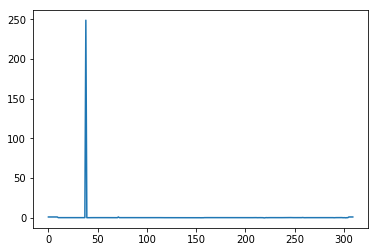

In [19]:
plt.figure()
daily_return_df.EXXI.plot()
#daily_return_df.AAMC.plot()
#daily_return_df.IBM.plot()

#daily_return_df.S1.plot()
#daily_return_df.S11.plot()
#daily_return_df.S2.plot()
#daily_return_df.S3.plot()


## Optional  : Save intermediate file and read back in .. Next time can start here

In [51]:
#daily_return_df.to_csv(path_or_buf='daily_return_2017.csv')
#daily_return_df = pd.read_csv('daily_return_2017.csv')

In [52]:
daily_return_df.head(15)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,0.062549,0.001476,0.001541,0.003218,-0.004462,0.004798,-0.008858,0.000576,-0.003907,0.000625,0.060532,-0.012351,-0.001288,0.000390,0.000068,0.009309,-0.011472,0.022225,0.001924,0.004331,0.068089,-0.015217,0.006376,-0.012895,0.011353,0.010326,-0.032078,0.013213,-0.012295,0.015421
1,0.420735,0.008063,-0.027640,-0.039293,-0.006469,-0.016553,-0.023141,0.032552,0.039167,-0.006911,0.385013,-0.077667,0.050973,-0.046790,-0.103577,0.057358,0.055959,0.060009,0.134971,0.020437,0.470155,-0.165391,-0.021876,-0.016860,-0.073149,0.041887,0.072889,0.161641,0.059544,0.015380
2,0.023870,-0.012943,-0.001203,-0.016344,-0.026941,-0.037455,0.012373,-0.029462,-0.043528,0.015218,0.053591,-0.109443,-0.051725,0.041378,0.044763,0.000566,-0.068804,-0.003563,-0.095370,-0.046111,0.122454,-0.177240,-0.039775,0.126955,0.051384,0.066746,-0.040735,0.077150,-0.153568,-0.030641
3,-0.264042,-0.042653,0.011842,0.003612,0.047914,0.049155,-0.036838,0.047316,0.041801,-0.033065,-0.301460,-0.063463,-0.021728,0.030079,0.094484,0.114858,-0.130619,0.046140,-0.046497,-0.122217,-0.282979,-0.028010,-0.092644,0.050672,0.146964,0.070919,-0.120420,0.117391,-0.057115,-0.186064
4,-0.419370,-0.016825,0.031305,-0.002624,0.002890,-0.011055,-0.000417,-0.007467,-0.023927,0.035929,-0.378699,-0.041285,0.005210,-0.049842,0.059492,0.009703,-0.046453,0.061824,-0.033732,0.128435,-0.419733,-0.124490,-0.027694,0.037905,0.127808,0.018284,0.004861,0.104777,0.056476,0.193299
5,-0.162582,0.000036,-0.025467,-0.026233,0.044181,0.013480,-0.018125,0.043157,-0.015102,-0.016744,-0.104134,0.092085,0.007352,-0.085642,0.141866,0.101052,-0.098368,0.093087,-0.022812,-0.030332,-0.185098,0.134644,-0.018312,-0.171597,0.055648,0.094107,-0.101041,0.029596,-0.030829,-0.052154
6,0.652699,0.022620,0.028532,0.001956,-0.013570,0.037275,0.032089,0.027073,0.030603,-0.047136,0.647507,0.041333,0.009871,0.018398,-0.055630,0.001380,0.103130,-0.027655,0.087337,-0.016821,0.683294,0.053549,0.006699,0.108226,0.027838,-0.023143,0.023904,-0.097534,0.042749,-0.076596
7,0.544235,-0.027267,0.021641,0.028968,-0.027008,0.010720,0.031189,0.014484,-0.035557,-0.024411,0.533631,-0.080897,0.044711,-0.000470,-0.116580,0.067591,0.075004,0.095911,-0.032555,0.030242,0.441951,0.005582,0.018699,0.023633,-0.202023,0.146668,0.041715,0.067887,-0.013680,-0.070575
8,0.125093,0.033607,0.004810,-0.028558,-0.015745,-0.005777,-0.025711,0.012742,-0.040671,-0.030014,0.061132,0.077569,0.021605,-0.121292,0.053663,0.083116,0.022284,0.043340,-0.044290,0.047023,-0.001252,0.054687,0.115643,-0.127464,0.098851,0.050919,0.088793,0.122933,-0.119500,-0.006295
9,-0.193098,0.012431,0.046406,-0.019854,0.012013,0.029683,0.044284,-0.049480,0.016473,0.049134,-0.236323,0.014540,-0.011822,-0.078132,0.006317,0.006281,-0.022282,-0.110040,0.092918,0.049298,-0.205155,0.091765,0.027691,-0.033354,0.044706,-0.085575,-0.026612,-0.063946,0.164429,0.076238


## Start some data analysis here !

In [53]:
daily_return_df.corr().head(20)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
S1,1.000000,0.223280,-0.310724,0.016918,-0.005527,-0.198892,0.010077,-0.143349,0.250987,0.390444,0.990418,-0.390887,-0.207763,0.066689,-0.276928,0.003074,0.025795,0.097799,0.325365,0.510670,0.984387,-0.189002,-0.131956,-0.045115,-0.198815,0.241100,-0.010939,-0.094592,0.202231,0.424338
S2,0.223280,1.000000,0.027363,0.048034,-0.246572,-0.110631,-0.055067,-0.036566,-0.161512,0.223549,0.204573,0.291133,-0.152130,-0.091966,-0.259723,-0.332028,0.173322,0.016232,0.375699,0.323810,0.222461,0.055091,-0.062939,-0.117295,-0.183869,-0.383053,0.159572,0.054683,0.177929,0.265954
S3,-0.310724,0.027363,1.000000,0.000544,-0.215055,0.257354,0.441887,0.043341,0.012000,-0.277199,-0.341055,0.425235,0.353539,-0.054985,-0.125168,0.080521,0.213288,-0.016801,0.177270,-0.133469,-0.347192,0.414953,0.272371,0.304907,0.010373,-0.082943,0.105316,0.041966,0.100112,-0.180031
S4,0.016918,0.048034,0.000544,1.000000,-0.075491,-0.031914,-0.088722,0.123572,-0.271456,0.114152,0.029144,-0.190947,0.045567,0.180132,-0.052546,-0.208453,0.043675,0.213443,-0.230273,0.037373,-0.009253,0.168635,0.126235,0.082613,-0.132734,-0.177824,-0.003937,0.171066,-0.172069,0.011126
S5,-0.005527,-0.246572,-0.215055,-0.075491,1.000000,0.225612,-0.402551,-0.010334,0.095763,0.114764,-0.014189,0.011399,-0.040987,-0.125034,0.600011,0.190396,-0.344061,-0.309556,-0.052673,-0.086314,0.011135,-0.031181,-0.067691,-0.138335,0.467663,0.266184,-0.297984,-0.138236,0.105861,-0.022985
S6,-0.198892,-0.110631,0.257354,-0.031914,0.225612,1.000000,0.157993,0.157645,0.383341,-0.418170,-0.220458,0.281337,0.259431,0.037687,0.345033,0.478556,0.043499,-0.128269,0.123072,-0.248686,-0.206035,0.391815,0.000169,-0.121340,0.290440,0.137305,-0.057577,-0.130733,0.190205,-0.209423
S7,0.010077,-0.055067,0.441887,-0.088722,-0.402551,0.157993,1.000000,-0.215189,0.015700,-0.028302,-0.000230,0.056722,0.148878,0.004355,-0.330380,0.114240,0.254720,-0.154542,0.202910,0.021182,-0.038102,0.176693,0.196609,0.282506,-0.234698,-0.159736,0.099457,-0.055218,0.225267,-0.146074
S8,-0.143349,-0.036566,0.043341,0.123572,-0.010334,0.157645,-0.215189,1.000000,0.113714,-0.328162,-0.120104,0.210374,0.450953,-0.189603,0.007564,0.289862,0.022113,0.621592,-0.104825,-0.009142,-0.168243,0.398902,0.142266,-0.270060,-0.166477,0.269960,0.079209,0.507990,-0.112156,-0.161792
S9,0.250987,-0.161512,0.012000,-0.271456,0.095763,0.383341,0.015700,0.113714,1.000000,0.078519,0.250391,0.030874,-0.041082,0.151808,-0.074743,0.157739,-0.216891,0.078587,0.595257,-0.003831,0.288363,0.094321,-0.221597,-0.093173,0.085944,0.026970,-0.119707,0.017171,0.576115,0.077472
S10,0.390444,0.223549,-0.277199,0.114152,0.114764,-0.418170,-0.028302,-0.328162,0.078519,1.000000,0.402390,-0.390255,-0.405622,0.112418,0.030308,-0.395499,-0.273518,-0.089702,0.289682,0.571588,0.404950,-0.258989,-0.163541,-0.028666,-0.042167,-0.255598,-0.060642,0.055145,0.384724,0.656409


In [54]:
num_symbols = len(daily_return_df.columns)
num_symbols

30

In [55]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
dr_pca_df = pca.fit_transform(daily_return_df)

In [56]:
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_


array([0.80555, 0.04058, 0.03554, 0.02579, 0.01936, 0.014  , 0.01349,
       0.00898, 0.0075 , 0.00543, 0.00491, 0.00399, 0.00292, 0.00215,
       0.00191, 0.00164, 0.00137, 0.00112, 0.00097, 0.00077])

In [ ]:
# Experiment 1 : Try one week intervals
# E